# Proyek Analisis Data: Anderson Usman
- **Nama:** Anderson Usman
- **Email:** anderusman2004@gmail.com
- **ID Dicoding:** Anderson Usman

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda terbanyak terjadi?
- Bagaimana variable cuaca (temp, atemp, humidity, dan wind_speed) mempengaruhi total penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [25]:
#Import data day.csv
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
#Import data hour.csv
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [27]:
hour_df.info() #Mengecek tipe data dari tiap kolum data
print(hour_df.isna().sum()) #Mengecek apakah terdapat data yang null
print(hour_df.duplicated().sum()) #Mengecek apakah terdapat data yang duplicate
hour_df.describe(include="all") #Mengecek apakah terdapat anomali data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
instant       0
dteday        0
season        0
y

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [28]:
day_df.info() #Mengecek tipe data dari tiap kolum data
print(day_df.isna().sum()) #Mengecek apakah terdapat data yang null
print(day_df.duplicated().sum()) #Mengecek apakah terdapat data yang duplicate
day_df.describe(include="all") #Mengecek apakah terdapat anomali data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Terdapat kesalahan tipe data pada kolum dteday baik pada data hour.csv dan day.csv
- Terdapat beberapa kolum data yang susah dimengerti karena masih dalam numerik
- Terdapat beberapa kolum header yang susah dimengerti
- Terdapat beberapa kolum data yang kurang penting

### Cleaning Data

In [29]:
#Mengganti tipe data pada kolum dteday menjadi datetime
hour_df["dteday"]=pd.to_datetime(hour_df["dteday"])
day_df["dteday"]=pd.to_datetime(day_df["dteday"])

In [30]:
#Mengganti tipe data pada beberapa kolum data yang akan diganti valuenya dari numerik ke data yang lebih mudah dimnengerti
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit', 'yr', 'holiday']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [31]:
#Mereplace data numerik menjadi data yang lebih mudah dimengerti pada hour_df
hour_df.rename(columns={"dteday":"date","yr":"year","mnth":"month","hr":"hour","weekday":"day","weathersit":"weather_situation","windspeed":"wind_speed","cnt":"count_total_rental"},inplace=True)
hour_df.day.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
hour_df.season.replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)
hour_df.weather_situation.replace({1:"Clear",2:"Mist",3:"Light Rain",4:"Heavy Rain"},inplace=True)
hour_df.month.replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)
hour_df.year.replace({0:"2011",1:"2012"},inplace=True)
hour_df.holiday.replace({0:"No Holiday",1:"Holiday"},inplace=True)
hour_df.head()

<ipython-input-31-2575830fe0b0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.day.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
<ipython-input-31-2575830fe0b0>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df.day.replace({0:"Sunday",1:

,instant,date,season,year,month,hour,holiday,day,workingday,weather_situation,temp,atemp,hum,wind_speed,casual,registered,count_total_rental
0,1,2011-01-01,Spring,2011,Jan,0,No Holiday,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No Holiday,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No Holiday,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No Holiday,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No Holiday,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
#Mereplace data numerik menjadi data yang lebih mudah dimengerti pada day_df
day_df.rename(columns={"dteday":"date","yr":"year","mnth":"month","weekday":"day","weathersit":"weather_situation","hum":"humidity","windspeed":"wind_speed","cnt":"count_total_rental"},inplace=True)
day_df.day.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
day_df.season.replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)
day_df.weather_situation.replace({1:"Clear",2:"Mist",3:"Light Rain",4:"Heavy Rain"},inplace=True)
day_df.month.replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)
day_df.year.replace({0:"2011",1:"2012"},inplace=True)
day_df.holiday.replace({0:"No Holiday",1:"Holiday"},inplace=True)
day_df.head()

<ipython-input-32-121a66b587b5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.day.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
<ipython-input-32-121a66b587b5>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.day.replace({0:"Sunday",1:"M

,instant,date,season,year,month,holiday,day,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_total_rental
0,1,2011-01-01,Spring,2011,Jan,No Holiday,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No Holiday,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No Holiday,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No Holiday,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No Holiday,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
#Menghilangkan kolum data yang kurang berguna
hour_df.drop(["workingday"],axis=1,inplace=True)
day_df.drop(["workingday"],axis=1,inplace=True)
hour_df.head()
day_df.head()

,instant,date,season,year,month,holiday,day,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_total_rental
0,1,2011-01-01,Spring,2011,Jan,No Holiday,Saturday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No Holiday,Sunday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No Holiday,Monday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No Holiday,Tuesday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No Holiday,Wednesday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore Data hour_df dan day_df

In [34]:
#Melihat penyewaan sepeda paling banyak terjadi pada jam berapa
hour_df.groupby(by="hour").count_total_rental.sum().sort_values(ascending=False)

,count_total_rental
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [35]:
#Melihat penyewaan sepeda paling banyak terjadi pada msuim apa
day_df.groupby(by="season").count_total_rental.sum().sort_values(ascending=False)

<ipython-input-35-fdce0995dabb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_total_rental.sum().sort_values(ascending=False)


,count_total_rental
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


In [36]:
#Mengecek penyewaan sepeda lebih banyak terjadi pada hari liburan atau tidak
day_df.groupby(by="holiday").count_total_rental.sum().sort_values(ascending=False)

<ipython-input-36-d387efe661e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="holiday").count_total_rental.sum().sort_values(ascending=False)


,count_total_rental
holiday,
No Holiday,3214244
Holiday,78435


**Insight:**
- Penyewaan sepeda paling banyak terjadi pada jam 5 sore dan paling sedikit pada jam 4 pagi
- Penyewaan sepeda paling banyak terjadi pada musim gugur dan paling sedikit terjadi pada musim semi
- Penyewaan sepeda kebanyakan terjadi pada hari biasa daripada hari liburan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda terbanyak terjadi?

In [37]:
#Menyiapkan data untuk divisualisasikan
season_order_df = day_df.groupby(by="season").count_total_rental.sum().sort_values(ascending=False).reset_index()
season_order_df['count_total_rental'] = pd.to_numeric(season_order_df['count_total_rental'])

<ipython-input-37-fc821a1cc45a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_order_df = day_df.groupby(by="season").count_total_rental.sum().sort_values(ascending=False).reset_index()


<ipython-input-38-58969d98404c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="count_total_rental", data=season_order_df, palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seab

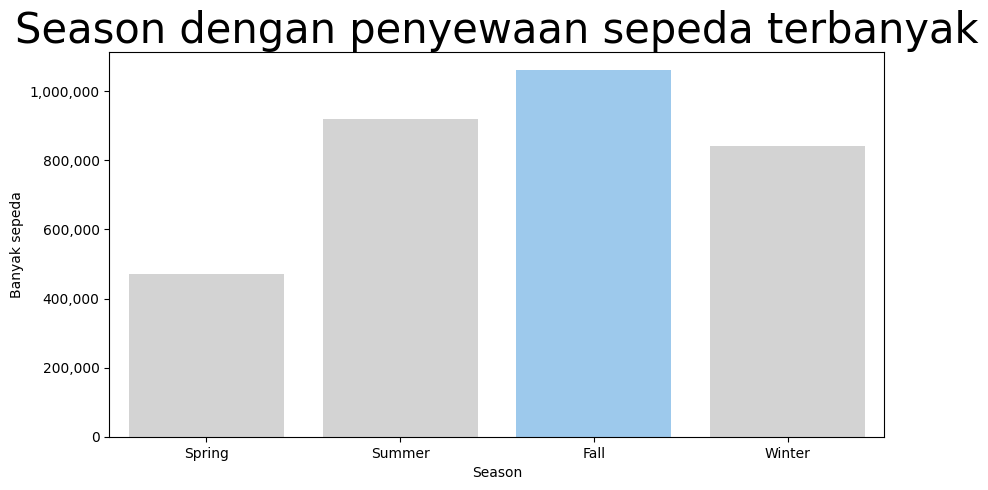

In [38]:
#Menvisualisasikan data
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="season", y="count_total_rental", data=season_order_df, palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"])

ax.set_ylabel(None)
ax.set_xlabel("Season", fontsize=10)
ax.set_ylabel("Banyak sepeda", fontsize=10)
ax.set_title("Season dengan penyewaan sepeda terbanyak", loc="center", fontsize=30)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)

# Set the y-axis labels to use a comma as a thousand separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

### Pertanyaan 2: Bagaimana variable cuaca (temp, atemp, humidity, dan wind_speed) mempengaruhi total penyewaan sepeda?

In [39]:
#Menyiapkan data untuk divisualisasikan
analysis_df = day_df[['temp', 'atemp', 'humidity','wind_speed','count_total_rental']]
correlation = analysis_df.corr()

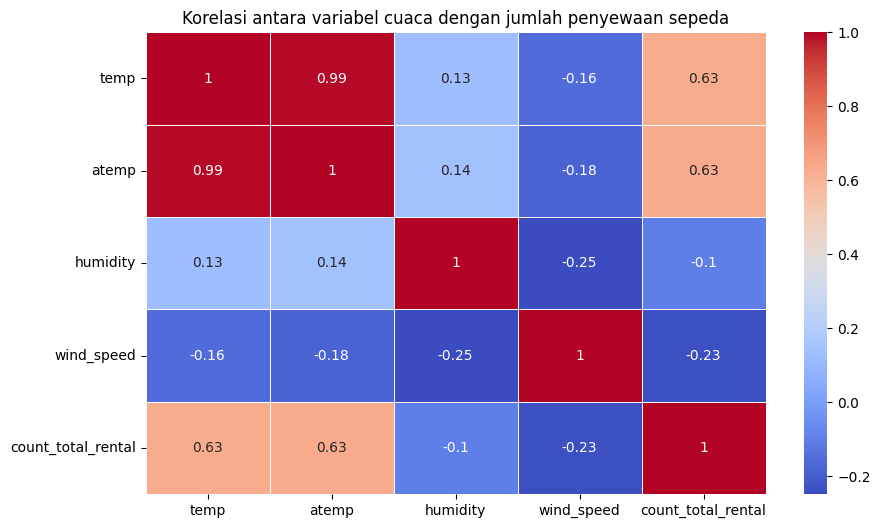

In [40]:
#Visualisasi Data
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi antara variabel cuaca dengan jumlah penyewaan sepeda")
plt.show()

## Analisis Lanjutan (Opsional)

In [41]:
hour_df.groupby(by="weather_situation").count_total_rental.sum().sort_values(ascending=False)

<ipython-input-41-1f34cdf7b32f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_total_rental.sum().sort_values(ascending=False)


,count_total_rental
weather_situation,
Clear,2338173
Mist,795952
Light Rain,158331
Heavy Rain,223


**Insight:**
- Penyewaan sepeda lebih banyak terjadi ketika hari clear

## Conclusion

- Penyewaan sepeda terbanyak terjadi pada musim gugur dan paling sedikit pada musim semi
- Tinggi atau tidaknya temperature pada hari itu sangat berpengaruh terhadap jumlah penyewaan sepeda, dimana semakin tinggi temperature maka semakin dikit juga penyewaan sepeda yang terjadi, sedangkan untuk humidity dan wind_speed memiliki pengaruh yang tidak begitu signifikan